In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [41]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<h1>Load and Prep dataset</h1>

In [93]:
data = pd.read_csv('../data/dataset.csv')
data.head()

,Symbol,Date,Open,High,Low,Close,Volume
0,A,2009-03-02 05:00:00,9.73,9.80,9.02,9.07,5994808
1,A,2009-03-03 05:00:00,9.22,9.34,8.88,9.07,7057671
2,A,2009-03-04 05:00:00,9.24,9.70,9.11,9.52,5427775
3,A,2009-03-05 05:00:00,9.28,9.46,8.95,8.97,9678690
4,A,2009-03-06 05:00:00,8.91,9.36,8.60,9.05,6800559


In [94]:
# Copy the data and sort by symbol and date
df = data.copy().sort_values(by=["Symbol", "Date"])
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", drop=True, inplace=True)
df.head()

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2009-03-02 05:00:00,A,9.73,9.80,9.02,9.07,5994808
2009-03-03 05:00:00,A,9.22,9.34,8.88,9.07,7057671
2009-03-04 05:00:00,A,9.24,9.70,9.11,9.52,5427775
2009-03-05 05:00:00,A,9.28,9.46,8.95,8.97,9678690
2009-03-06 05:00:00,A,8.91,9.36,8.60,9.05,6800559


In [95]:
# Group by symbol and describe the data
stats_by_stock:pd.DataFrame = df.groupby("Symbol").describe()
stats_by_stock.head()
# Uncomment to save the stats to a file
# stats_by_stock.to_excel("./stats_by_stock.xlsx")

Open                                                            \
         count       mean        std    min    25%    50%    75%     max   
Symbol                                                                     
A       2769.0  42.459509  18.626818   8.91  28.41  39.28  59.13   89.97   
AAON    2769.0  22.021531  13.418521   5.03   8.97  20.53  33.50   56.77   
AAPL    2769.0  26.613012  15.857837   3.01  14.28  23.97  36.44   81.18   
AB      2769.0  23.772066   5.019205  10.50  21.37  24.24  27.37   35.63   
ABC     2769.0  65.054861  27.112516  14.10  38.28  74.09  87.27  117.39   

          High                                                            \
         count       mean        std    min    25%    50%    75%     max   
Symbol                                                                     
A       2769.0  42.866324  18.735752   9.28  28.81  39.66  59.57   90.64   
AAON    2769.0  22.336649  13.594149   5.12   9.08  20.87  33.90   58.85   
AAPL    2769.0  26.854706  16.008117   3.13  14.40  24.18  36.79   81.96   
AB      2769.0  24.090722   5.028203  10.92  21.65  24.56  27.70   36.06   
ABC     2769.0  65.693980  27.380464  14.78  38.72  75.05  88.06  120.68   

           Low                                                            \
         count       mean        std    min    25%    50%    75%     max   
Symbol                                                                     
A       2769.0  42.047570  18.499743   8.60  28.15  38.89  58.49   89.84   
AAON    2769.0  21.715179  13.256031   4.85   8.82  20.16  33.05   56.31   
AAPL    2769.0  26.370849  15.734694   2.94  14.11  23.72  36.24   80.84   
AB      2769.0  23.459202   4.994666  10.12  21.10  23.95  27.00   35.45   
ABC     2769.0  64.396988  26.827519  13.75  37.90  73.19  86.28  114.75   

         Close                                                            \
         count       mean        std    min    25%    50%    75%     max   
Symbol                                                                     
A       2769.0  42.472033  18.614912   8.90  28.43  39.33  58.99   90.13   
AAON    2769.0  22.041954  13.435865   4.94   8.97  20.50  33.55   57.59   
AAPL    2769.0  26.622297  15.883742   2.97  14.24  23.98  36.57   81.80   
AB      2769.0  23.773221   5.014664  10.27  21.37  24.27  27.39   35.82   
ABC     2769.0  65.064948  27.099850  14.10  38.31  74.03  87.29  115.48   

        Volume                                                       \
         count          mean           std         min          25%   
Symbol                                                                
A       2769.0  3.487931e+06  2.234113e+06    271858.0    1917122.0   
AAON    2769.0  1.705533e+05  1.481593e+05         0.0     104603.0   
AAPL    2769.0  3.146664e+08  2.376126e+08  45448180.0  128960748.0   
AB      2769.0  3.650363e+05  2.365964e+05     46224.0     213487.0   
ABC     2769.0  2.276602e+06  1.448505e+06    283373.0    1379461.0   

                                                
                50%          75%           max  
Symbol                                          
A         2949921.0    4468486.0  2.536965e+07  
AAON       141948.0     197953.0  5.311215e+06  
AAPL    244032876.0  435579844.0  1.880987e+09  
AB         300941.0     443183.0  3.258188e+06  
ABC       1941879.0    2772532.0  1.924127e+07

In [96]:
# Select valid symbols
upper_bound = stats_by_stock["Open"]["max"] < 500
lower_bound = stats_by_stock["Open"]["min"] > 1
outliers_removed = stats_by_stock[upper_bound & lower_bound]
valid_symbols = outliers_removed.index.to_list()

# Remove outliers from the data
mask = df["Symbol"].isin(valid_symbols)
df = df[mask]
print(df.shape)
df.head()

(4784832, 6)


,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2009-03-02 05:00:00,A,9.73,9.80,9.02,9.07,5994808
2009-03-03 05:00:00,A,9.22,9.34,8.88,9.07,7057671
2009-03-04 05:00:00,A,9.24,9.70,9.11,9.52,5427775
2009-03-05 05:00:00,A,9.28,9.46,8.95,8.97,9678690
2009-03-06 05:00:00,A,8.91,9.36,8.60,9.05,6800559


Symbol
AAPL     Axes(0.125,0.2;0.775x0.68)
ADBE     Axes(0.125,0.2;0.775x0.68)
AMD      Axes(0.125,0.2;0.775x0.68)
AMZN     Axes(0.125,0.2;0.775x0.68)
GOOGL    Axes(0.125,0.2;0.775x0.68)
INTC     Axes(0.125,0.2;0.775x0.68)
MSFT     Axes(0.125,0.2;0.775x0.68)
NFLX     Axes(0.125,0.2;0.775x0.68)
NVDA     Axes(0.125,0.2;0.775x0.68)
T        Axes(0.125,0.2;0.775x0.68)
Name: Open, dtype: object

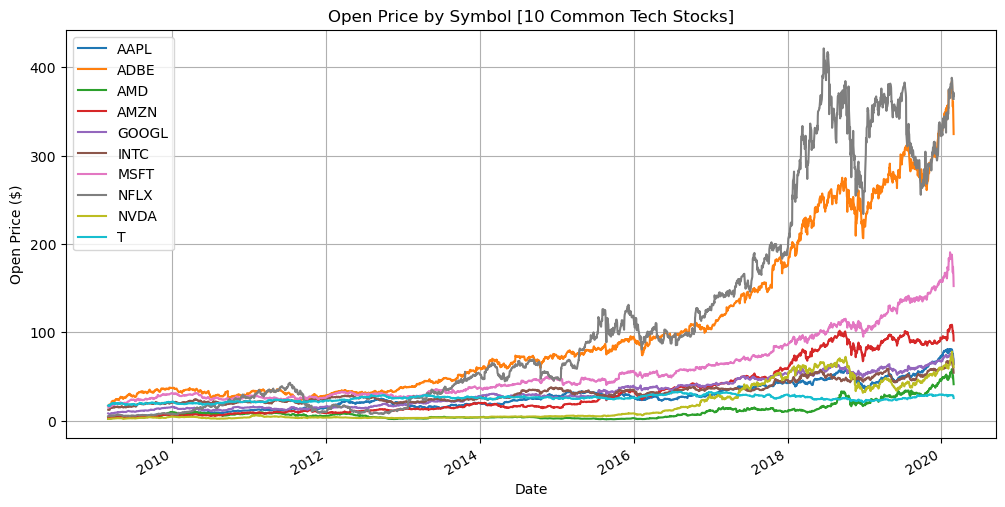

In [102]:
# Plot the open price by symbol for all stocks
# df.groupby("Symbol")["Open"].plot(figsize=(20, 10), legend=False, title="Open Price by Symbol [All Stocks]")
# Plot the open price by symbol for 10 tech stocks
select_stocks = ["AAPL", "ADBE", "AMD", "AMZN", "GOOGL", "INTC", "MSFT", "NVDA", "NFLX", "T"]
df[df["Symbol"].isin(select_stocks)].groupby("Symbol")["Open"].plot(figsize=(12, 6), legend=True, title="Open Price by Symbol [10 Common Tech Stocks]", ylabel="Open Price ($)", grid=True)